In [1]:
import numpy as np 

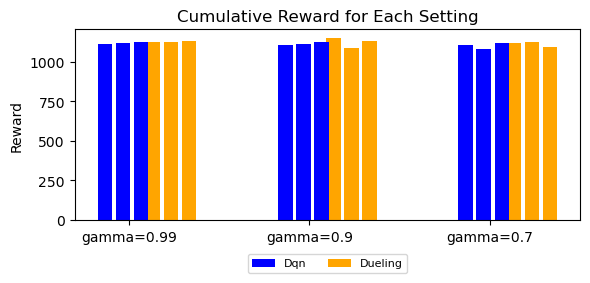

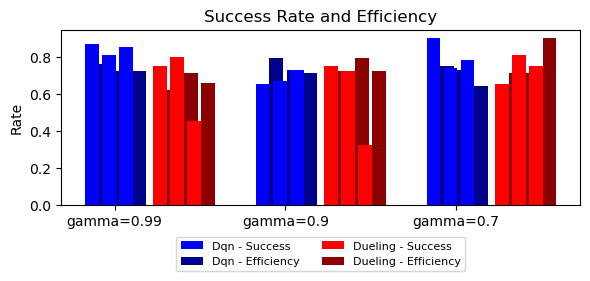

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = './metrics_gamma.xlsx'
df = pd.read_excel(file_path, index_col=0)

unique_labels = []
seen = set()
for col in df.columns:
    base_lst = str(col).split('.')
    base = base_lst[0] + '.' + base_lst[1]
    if base not in seen:
        unique_labels.append(base)
        seen.add(base)

group_labels = unique_labels
num_groups = len(group_labels)
trials_per_group = len(df.columns) // num_groups
bar_width = 0.12
group_spacing = 1.5
bar_spacing = 0.15

data = {}
for model in df.index:
    row_data = []
    for val in df.loc[model]:
        triple = tuple(map(float, str(val).split(',')))
        row_data.append(triple)
    data[model] = row_data

plt.figure(figsize=(6, 3))
for g in range(num_groups):
    for t in range(trials_per_group):
        i = g * trials_per_group + t
        x_base = g * group_spacing + t * bar_spacing
        for j, model_type in enumerate(['dqn', 'dueling']):
            val = data[model_type][i][0]
            plt.bar(x_base + j * 0.4, val, width=bar_width,
                    color='blue' if model_type == 'dqn' else 'orange',
                    label=model_type.capitalize() if g == 0 and t == 0 else "")

xtick_positions = [group_spacing * i + 0.2 for i in range(num_groups)]
plt.xticks(xtick_positions, group_labels)
plt.ylabel("Reward")
plt.title("Cumulative Reward for Each Setting")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, fontsize=8)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 3))
for g in range(num_groups):
    for t in range(trials_per_group):
        i = g * trials_per_group + t
        x_base = g * group_spacing + t * bar_spacing
        for j, model_type in enumerate(['dqn', 'dueling']):
            sr = data[model_type][i][1]
            eff = data[model_type][i][2]
            color_sr = 'blue' if model_type == 'dqn' else 'red'
            color_eff = 'darkblue' if model_type == 'dqn' else 'darkred'

            plt.bar(x_base + j * 0.6, sr, width=bar_width, color=color_sr,
                    label=f'{model_type.capitalize()} - Success' if g == 0 and t == 0 else "")
            plt.bar(x_base + j * 0.6+bar_width, eff, width=bar_width, color=color_eff,
                    label=f'{model_type.capitalize()} - Efficiency' if g == 0 and t == 0 else "")

plt.xticks(xtick_positions, group_labels)
plt.ylabel("Rate")
plt.title("Success Rate and Efficiency")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, fontsize=8)
plt.tight_layout()
plt.show()




